# Solución de problemas de valor inicial para EDOs


En esta sección presentamos tres métodos para resolver problemas de valor inicial del tipo

$$ y' = f(x, y) \\ y(a) = y_{0} $$

que poseen una única solución en un intervalo $[a, b]$, la cual denotamos por $y$. Deseamos aproximar $y$ en un conjunto finito de puntos en $[a, b]$ y estipulamos que estos puntos estarán uniformemente espaciados, por lo que seleccionamos un entero positivo $n$ y definimos el *tamaño de paso* como $h = \frac{b- a}{n}$. Así, tomamos

$$ x_{i} = a + ih $$

para $i = 0, 1, 2, \ldots , n$. Entonces tenemos que $x_{i+1} - x_{i} = h$ y denominamos a cada uno de estos $n+1$ puntos como *puntos de malla*. Buscamos generar $n + 1$ aproximaciones $y_{i}$ a los valores $y(x_{i})$.

El primer método, el método de Euler, es lo suficientemente elemental como para que podamos incluir su deducción. Si añadimos la suposición que $y \in C^{2} [a, b]$, podemos aplicar el teorema de Taylor a $y$ tomando como centro un punto de malla $x_{i}$ arbitrario. Entonces para todo $x \in [a, b]$ tenemos que

$$ y(x) = y(x_{i}) + y'(x_{i})(x - x_{i}) + \frac{y''( \xi _{i} )}{2} (x - x_{i})^{2} $$

donde $ \xi _{i} $ se encuentra entre $x$ y $x_{i}$. Ahora evaluemos en el punto de malla $x_{i+1}$ 

$$ y(x_{i+1}) = y(x_{i}) + y'(x_{i})(x_{i+1} - x_{i}) + \frac{y''( \xi _{i} )}{2} (x_{i+1} - x_{i})^{2} $$

de lo que podemos deducir que 

$$ y(x_{i+1}) = y(x_{i}) + f(x_{i}, y(x_{i}))h +  O ( h^{2} ) $$

Si descartamos el término $ O ( h^{2} ) $ podemos generar $n+1$ aproximaciones $y_{i+1}  \approx y_{i} + f(x_{i}, y_{i})h $ comenzando con la condición inicial $y_{0}$.

Notamos que para obtener $y_{n+1}$ a partir de $y_{n}$, el método de Euler requiere una única evaluación de $f$ en el punto $(x_{n}, y_{n})$. Los métodos de Runge-Kutta buscan lograr mejor precisión aumentando las evaluaciones de $f( \cdot , \cdot)$ en puntos intermedios entre $(x_{n}, y(x_{n}))$ y $(x_{n+1}, y(x_{n+1}))$. Una buena descripción de la deducción de estos métodos se puede encontrar en [S&M] y [B&F]. Nosotros utilizaremos el método mejorado de Euler, que es un método de Runge-Kutta de segundo orden, y el método de Runge-Kutta de cuarto orden.

### Dependencias y declaraciones comunes

In [6]:
from sympy import *
from ipywidgets import widgets

from IPython.display import display, display_html, HTML, Latex
import numpy as np

#Definimos las variables a utilizar
x, y = symbols('x y')
f = Function('f')(x, y)
sol = Function('sol')(x)

# Método para imprimir la información en forma de tabla
def printTable(columns, data):
    base_table = ( '<table class="table-bordered table-responsive"><thead><tr>{}'
             '</tr></thead><tbody><tr>{}</tr>'
             '</tbody></table>'
    ).format(
        '<th style="width:40px; text-align:center">{}</th>'.format(
            '</th><th style="text-align:center">'.join(j for j in columns)),
        '</tr><tr>'.join(
            '<td style="text-align:center;">{}</td>'.format('</td><td>'.join(j for j in row)) for row in data
        )
    )
    display(HTML(base_table))

### Parámetros

In [7]:
# Solicitando la función a evaluar
while True:
    try:
        f = sympify(input("Ingrese la expresión f en términos de x, y:  "))
        sol = sympify(input("Ingrese la solución analítica: "))
        break
    except SympifyError:
        print("¡Ups! Parece que la función no fue ingresada correctamente. Intente de nuevo.")
display(Latex("$$ y' = " + latex(f) + " $$"))

Ingrese la expresión f en términos de x, y:  x*exp(3*x) - 2*y
Ingrese la solución analítica: (1/5)*x*exp(3*x) - (1/25)*exp(3*x) + (1/25)*exp(-2*x)


<IPython.core.display.Latex object>

In [8]:
# Solicitando los demás valores
while True:
    try:
        a = float(input("Ingrese el límite inferior del intervalo (a): "))
        b = float(input("Ingrese el límite superior del intervalo (b): "))
        y0 = float(input("Ingrese la condición inicial (y0): "))
        h = float(input("Ingrese el tamaño del paso(h): "))
        break
    except ValueError:
        print("El valor ingresado no es un número. Intente de nuevo.")

Ingrese el límite inferior del intervalo (a): 0
Ingrese el límite superior del intervalo (b): 1
Ingrese la condición inicial (y0): 0
Ingrese el tamaño del paso(h): 0.5


### Método de Euler

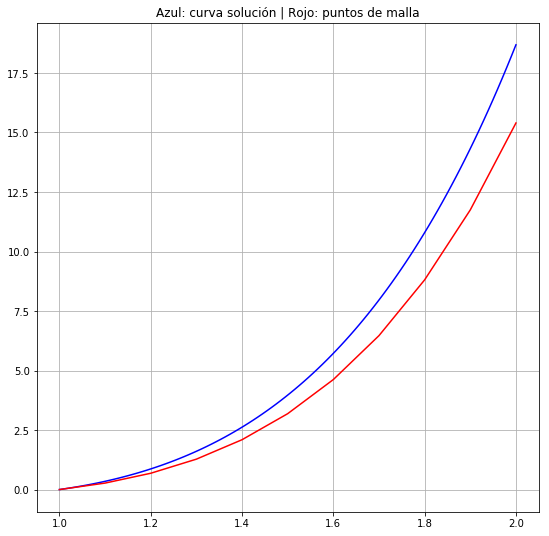

In [4]:
import matplotlib.pyplot as plt;
fig, ax = plt.subplots(figsize=(9, 9));

#Definimos las columnas que contendrá la tabla    
columns = ["i", "x<sub>i</sub>", "y<sub>i</sub>", "y(x<sub>i</sub>)", "E<sub>abs</sub>"]
data = []

xvalueseuler = []
yvalueseuler = []

i=0
n = int((b-a)/h) #determinamos los puntos de malla -1
t = a
w = y0
xvalueseuler.append(t)
yvalueseuler.append(w)
val = sol.subs(x, t).evalf()
e_abs = abs(w - val)

aux = [str(i), str(t), str(w), str(val), str(e_abs)]
data.append(aux)

for i in range(1, n+1):
    w = w + h*f.subs({x:t, y:w})
    t = a + i*h
    val = sol.subs(x, t).evalf()
    e_abs = abs(w - val)
    aux = [str(i), str(t), str(w), str(val), str(e_abs)]
    data.append(aux)
    xvalueseuler.append(t)
    yvalueseuler.append(w)
       
lambdaf = lambdify(x, sol);
#ax.axhline(y=0, color="k")
#ax.axvline(x=0, color="k")
xv = np.linspace(a , b  , 100)
ax.plot(xv, lambdaf(xv), color='blue')
plt.plot(xvalueseuler, yvalueseuler, color='red');
plt.title("Azul: curva solución | Rojo: puntos de malla");
plt.grid();
plt.show()

In [5]:
printTable(columns, data) 

i,xi,yi,y(xi),Eabs
0,1.0,0.0,-1.44564689172925e-16,1.44564689172925e-16
1,1.1,0.271828182845905,0.345919876539740,0.0740916936938353
2,1.2,0.684755577715406,0.866642535759603,0.181886958044197
3,1.3,1.27697834420870,1.60721507818074,0.330236733972034
4,1.4,2.09354768783769,2.62035955123583,0.526811863398139
5,1.5,3.18744512245892,3.96766629422779,0.780221171768872
6,1.6,4.62081784627951,5.72096152559634,1.10014367931683
7,1.7000000000000002,6.46639637770960,7.96387347784497,1.49747710013537
8,1.8,8.80911968894342,10.7936246604906,1.98450497154722
9,1.9,11.7479965439625,14.3230815358910,2.57508499192853


### Método modificado de Euler

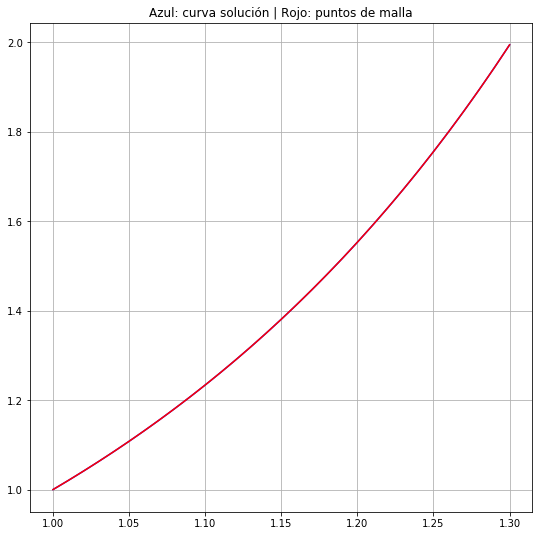

In [15]:
import matplotlib.pyplot as plt;
fig, ax = plt.subplots(figsize=(9, 9));

#Definimos las columnas que contendrá la tabla    
columns = ["i", "x<sub>i</sub>", "y<sub>i</sub>", "y(x<sub>i</sub>)", "E<sub>abs</sub>"]
data = []

xvaluesmeuler = []
yvaluesmeuler = []

i=0
n = int((b-a)/h) #determinamos los puntos de malla -1
t = a
w = y0
xvaluesmeuler.append(t)
yvaluesmeuler.append(w)
val = sol.subs(x, t).evalf()
e_abs = abs(w - val)

aux = [str(i), str(t), str(w), str(val), str(e_abs)]
data.append(aux)

for i in range(1, n+1):
    w = w + (h/2)*( f.subs({x:t, y:w}) + f.subs({x:t+h, y: w + h*f.subs({x:t, y:w})})  )
    t = a + i*h
    val = sol.subs(x, t).evalf()
    e_abs = abs(w - val)
    aux = [str(i), str(t), str(w), str(val), str(e_abs)]
    data.append(aux)
    xvaluesmeuler.append(t)
    yvaluesmeuler.append(w)
       
lambdaf = lambdify(x, sol);
#ax.axhline(y=0, color="k")
#ax.axvline(x=0, color="k")
xv = np.linspace(a , b  , 100)
ax.plot(xv, lambdaf(xv), color='blue')
plt.plot(xvaluesmeuler, yvaluesmeuler, color='red');
plt.title("Azul: curva solución | Rojo: puntos de malla");
plt.grid();
plt.show()

In [16]:
printTable(columns, data) 

i,xi,yi,y(xi),Eabs
0,1.0,1.0,1.00000000000000,0
1,1.01,1.02030200000000,1.02030336526194,1.36526193528219e-6
2,1.02,1.04122435362408,1.04122718177803,2.82815395014069e-6
3,1.03,1.06278823493456,1.06279262961009,4.39467553681183e-6
4,1.04,1.08501564314915,1.08502171433051,6.07118135054208e-6
5,1.05,1.10792943750744,1.10793730190980,7.86440236888453e-6
6,1.06,1.13155337373163,1.13156315519997,9.78146833974236e-6
7,1.07,1.15591214215941,1.15592397209100,1.18299315869930e-5
8,1.08,1.18103140763014,1.18104542542241,1.40177922713924e-5
9,1.09,1.20693785121032,1.20695420473551,1.63535251864744e-5


### Método Runge-Kutta de orden 4

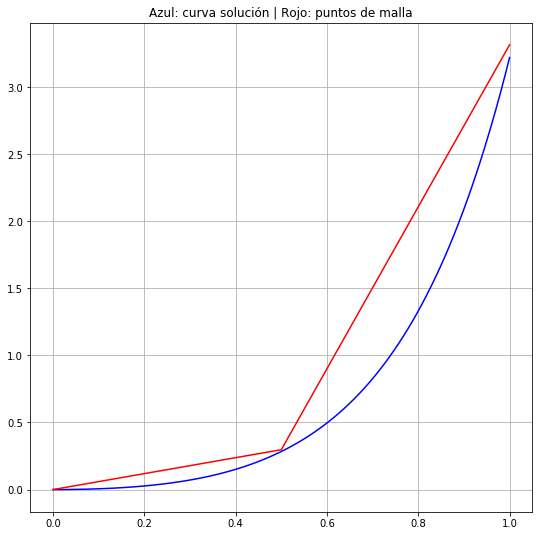

In [9]:
import matplotlib.pyplot as plt;
fig, ax = plt.subplots(figsize=(9, 9));

#Definimos las columnas que contendrá la tabla    
columns = ["i", "x<sub>i</sub>", "y<sub>i</sub>", "k<sub>1</sub>", "k<sub>2</sub>", "k<sub>3</sub>", "k<sub>4</sub>",
           "y(x<sub>i</sub>)", "E<sub>abs</sub>"]
data = []

xvaluesrk = []
yvaluesrk = []

i=0
n = int((b-a)/h) #determinamos los puntos de malla -1
t = a
w = y0
xvaluesrk.append(t)
yvaluesrk.append(w)
val = sol.subs(x, t).evalf()
e_abs = abs(w - val)

aux = [str(i), str(t), str(w), "-", "-", "-", "-",  str(val), str(e_abs)]
data.append(aux)

for i in range(1, n+1):
    
    #Primero calculamos las Ks
    k1 = h*f.subs({x:t, y:w})
    k2 = h*f.subs({x:t + h/2, y:w + k1/2})
    k3 = h*f.subs({x:t + h/2, y:w + k2/2})
    k4 = h*f.subs({x:t + h, y:w + k3})
    
    w = w + (1/6)*(k1 + 2*k2 + 2*k3 + k4)
    t = a + i*h
    val = sol.subs(x, t).evalf()
    e_abs = abs(w - val)
    aux = [str(i), str(t), str(w), str(k1), str(k2), str(k3), str(k4), str(val), str(e_abs)]
    data.append(aux)
    xvaluesrk.append(t)
    yvaluesrk.append(w)
       
lambdaf = lambdify(x, sol);
#ax.axhline(y=0, color="k")
#ax.axvline(x=0, color="k")
xv = np.linspace(a , b  , 100)
ax.plot(xv, lambdaf(xv), color='blue')
plt.plot(xvaluesrk, yvaluesrk, color='red');
plt.title("Azul: curva solución | Rojo: puntos de malla");
plt.grid();
plt.show()

In [10]:
printTable(columns, data)

i,xi,yi,k1,k2,k3,k4,y(xi),Eabs
0,0.0,0.0,-,-,-,-,0,0
1,0.5,0.296997462129329,0,0.264625002076584,0.132312501038292,0.988109766546224,0.283616521867142,0.0133809402621879
2,1.0,3.31431177747785,0.823424805455187,2.84919107377752,1.83630793961636,7.90946305984815,3.21909931903949,0.0952124584383545


### Referencias

[B&F] Burden, R. L., & Faires, D. J. & Burden, A. M. (2017). Problemas de valor inicial para ecuaciones diferenciales ordinarias. En *Análisis numérico*, 10a ed. Cengage Learning.


[S&M] Süli, E., & Mayers, D. F. (2002). Initial value problems for ODEs. En *An introduction to numerical analysis*. Cambridge: Cambridge University Press.